In [1]:
import multiprocessing as mp
no_threads = mp.cpu_count()
no_threads

4

In [2]:
import numpy as np 
import pandas as pd

In [3]:
csv_file = '~/Documents/uni/y3s1/19S1-CE4042-CZ4042-NEURAL NETWORK  DEEP LEARNING/Content/assignment1/admission_predict.csv'

df = pd.read_csv(csv_file, index_col=[0])

In [4]:
df.shape

(400, 8)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preperation

In [65]:
from sklearn.model_selection import train_test_split

seed = 10

np.random.seed(seed)

data = df.values
np.random.shuffle(data)

X = data[:, :-1]
y = data[:, -1].reshape(-1,1)

def scale(X, decimals):
    return np.round((X - np.mean(X, axis=0))/ np.std(X, axis=0), decimals=decimals)

X = scale(X, 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280, 1), (120, 1))

## Define all libraries and functions needed

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.regularizers import l2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/heyuhao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Q1

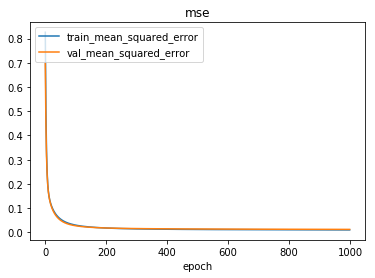

In [81]:
#a)

lr = 1e-3
decay = 1e-3
batch_size = 8
epochs = 1000

model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, y_test), shuffle=True)

plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')

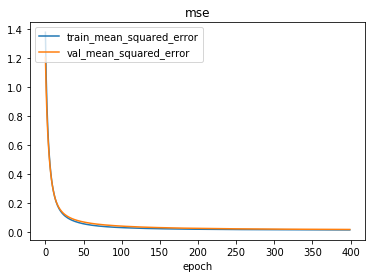

In [86]:
# b)
# As we can see, the test error converges at around 400 epochs
epochs = 400

model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, y_test), shuffle=True)

plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')

(50, 7) (50, 1)


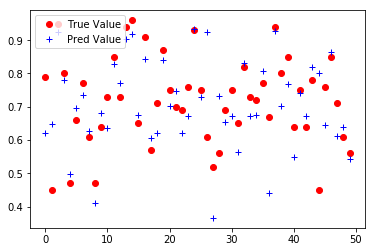

In [87]:
# c)
_, X_test_50, _, y_test_50 = train_test_split(X_test, y_test, test_size=50, random_state=42)
print(X_test_50.shape, y_test_50.shape)

y_pred_50 = model.predict(x=X_test_50)

plt.figure()
plt.plot(y_test_50, 'ro')
plt.plot(y_pred_50, 'b+')
plt.legend(['True Value', 'Pred Value',], loc='upper left')

## Q2.Correlation Matrix

In [37]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


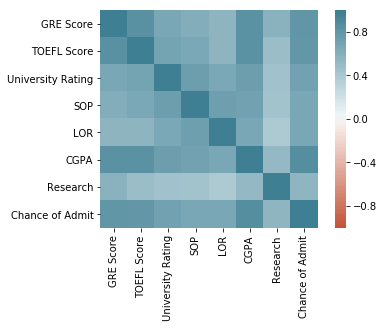

In [38]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [47]:
#a) most correlated features
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)-1):
    for j in range(i+1, len(corr)-1):
        if corr.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('GRE Score', 'TOEFL Score', 0.8359768030143953)

In [48]:
#b) 
related_feature_of_admit = [(corr.columns[i], corr.iloc[-1, i]) for i in (np.argsort(corr.iloc[-1,:-1].tolist())[::-1])]
related_feature_of_admit[0]

('CGPA', 0.8732890993553011)

## Q3 Recuisive Feature Elimination

### TODO
for every feature set:
    do{
        use cross validation + early stop, get the average of best epochs for all validations
        train model with all training data for the average best epoch
        get mse 
    }
    


In [79]:
#a) keep 6 features

features = list(df.columns)[:-1]
print(features)

mse = dict(zip(features, [0 for i in features]))

for i in range(len(features)):
    excluded_feature = features[i]
    print(f'removed {excluded_feature}...')
    X_train_removed, X_test_removed = np.delete(X_train, obj=i, axis=1), np.delete(X_test, obj=i, axis=1)
    
    model, _ = train(X_train=X_train_removed, y_train=y_train, X_test=None, y_test=None, epochs=10000, verbose=0)
    
    mse[excluded_feature] = model.evaluate(x=X_test_removed, y=y_test)
    
print(mse)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
removed GRE Score...
120/120 [==============================] - 0s 2ms/step
removed TOEFL Score...
120/120 [==============================] - 0s 2ms/step
removed University Rating...


KeyboardInterrupt: 

## Q4